In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     |████████████████████████████████| 788kB 5.5MB/s 
     |████████████████████████████████| 368kB 26.2MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
     |████████████████████████████████| 122kB 6.2MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.


In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.29G/6.31G [01:04<00:00, 127MB/s]
100% 6.31G/6.31G [01:04<00:00, 105MB/s]


In [ ]:
!mkdir /content/cancerdata
!unzip -qq histopathologic-cancer-detection.zip -d /content/cancerdata

In [ ]:
#Load modules

import keras,cv2,os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D

#from tqdm import tqdm_notebook,trange
import matplotlib.pyplot as plt
import gc #garbage collection save all the RAM 
import numpy as np
import numpy 
import pandas as pd
from glob import glob 
import os
import keras.backend as K
import tensorflow as tf
import io
from PIL import Image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_host(resolver.master())
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)
tf.config.experimental_connect_to_cluster(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.50.119.2:8470
INFO:tensorflow:Clearing out eager caches
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import glob
paths_train = [os.path.basename(x) for x in glob.glob("/content/cancerdata/train/*.tif")]
paths_test = [os.path.basename(x) for x in glob.glob("/content/cancerdata/test/*.tif")]

In [ ]:
len(paths_train)

220025

In [ ]:
df_train = pd.read_csv('/content/cancerdata/train_labels.csv')

In [ ]:
len(df_train)

220025

In [ ]:
full_train_df = df_train

In [ ]:
path = ''
train_path = paths_train
test_path = paths_test

df = pd.DataFrame({'path': (train_path)}) 
df['id'] = df.path.map(lambda x: x.split(".")[0]) # file names 
labels = df_train 
df = df.merge(labels, on = "id") # merge labels and filepaths

In [ ]:
# Just selected top 1000 for trail run 
df = df.head(90000)
df.shape

(90000, 3)

In [ ]:
def imge_nump(y):
    numpy_image = tf.keras.preprocessing.image.load_img('/content/cancerdata/train/'+y)
    return numpy_image

In [ ]:
def imge_nump_test(y):
    pil_image=Image.open('/content/cancerdata/test/'+y) 
    numpy_image=numpy.array(pil_image)
    numpy_image = tf.keras.preprocessing.image.array_to_img(numpy_image)
    return numpy_image

In [ ]:
df['image'] = df.apply(lambda x: imge_nump(x['path']), axis=1)

In [ ]:
x = np.stack(list(df.image), axis = 0)
del df['image']
x.shape

(90000, 96, 96, 3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils


train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(df.label)

train_tensors, test_tensors, train_targets, test_targets = train_test_split(x, y, train_size = train_fraction, random_state = 42)

val_size = int(0.5*len(test_tensors))

val_tensors = test_tensors[:val_size]
val_targets = test_targets[:val_size]
test_tensors = test_tensors[val_size:]
test_targets = test_targets[val_size:]

# x = None
# test_tensors = None


In [ ]:
with strategy.scope():
  # model = create_model()
  # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.sparse_categorical_crossentropy,
  #               metrics=[tf.keras.metrics.sparse_categorical_accuracy])
  # model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
  tf.random.set_seed(42)

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
  model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 3)) 

  model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
  model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
  model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 3)) 

  model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = 3))

  model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
  model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
  model.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'elu'))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import time

start = time.time()
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                                verbose=1, save_best_only=True)
epochs = 15
model.fit(train_tensors, train_targets, validation_data=(val_tensors, val_targets),epochs=epochs, 
          batch_size=1000, verbose=1, callbacks = [early_stopping, checkpointer])
print("Total time: ", (time.time() - start)/60, "minutes")

Epoch 1/15
72/72 [==============================] - 17s 98ms/step - loss: 0.2410 - accuracy: 0.9009 - val_loss: 0.2471 - val_accuracy: 0.9003

Epoch 00001: val_loss improved from inf to 0.24705, saving model to weights.hdf5
Epoch 2/15
72/72 [==============================] - 3s 41ms/step - loss: 0.2260 - accuracy: 0.9080 - val_loss: 0.2511 - val_accuracy: 0.9000

Epoch 00002: val_loss did not improve from 0.24705
Epoch 3/15
72/72 [==============================] - 3s 41ms/step - loss: 0.2215 - accuracy: 0.9099 - val_loss: 0.2392 - val_accuracy: 0.9024

Epoch 00003: val_loss improved from 0.24705 to 0.23920, saving model to weights.hdf5
Epoch 4/15
72/72 [==============================] - 3s 41ms/step - loss: 0.2158 - accuracy: 0.9128 - val_loss: 0.2492 - val_accuracy: 0.8977

Epoch 00004: val_loss did not improve from 0.23920
Epoch 5/15
72/72 [==============================] - 3s 41ms/step - loss: 0.2138 - accuracy: 0.9138 - val_loss: 0.2413 - val_accuracy: 0.8999

Epoch 00005: val_loss

In [ ]:
def auc(y_true, y_pred):   
    ptas = tf.stack([binary_PTA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.stack([binary_PFA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.concat([tf.ones((1,)) ,pfas],axis=0)
    binSizes = -(pfas[1:]-pfas[:-1])
    s = ptas*binSizes
    return K.sum(s, axis=0)

#------------------------------------------------------
#------------------------------------------------------
# PFA, prob false alert for binary classifier
def binary_PFA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # N = total number of negative labels
    N = K.sum(1 - y_true)
    # FP = total number of false alerts, alerts from the negative class labels
    FP = K.sum(y_pred - y_pred * y_true)
    return FP/N

#------------------------------------------------------
#------------------------------------------------------

# PTA prob true alerts for binary classifier
def binary_PTA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # P = total number of positive labels
    P = K.sum(y_true)
    # TP = total number of correct alerts, alerts from the positive class labels
    TP = K.sum(y_pred * y_true)
    return TP/P

In [ ]:
pil_image_pred=Image.open('/content/cancerdata/test/000270442cc15af719583a8172c87cd2bd9c7746.tif')
numpy_image_pred=numpy.array(pil_image_pred)
numpy_image_pred

array([[[159, 127, 166],
        [146, 111, 151],
        [138, 101, 142],
        ...,
        [132,  84, 124],
        [195, 136, 182],
        [130,  64, 112]],

       [[122,  90, 131],
        [ 91,  56,  98],
        [ 46,   9,  52],
        ...,
        [152, 111, 143],
        [148,  98, 133],
        [169, 113, 150]],

       [[ 49,  16,  59],
        [ 49,  13,  57],
        [ 61,  24,  67],
        ...,
        [142, 110, 134],
        [235, 196, 223],
        [255, 239, 255]],

       ...,

       [[151,  98, 140],
        [ 83,  30,  72],
        [ 93,  40,  82],
        ...,
        [151, 106, 147],
        [ 87,  48,  92],
        [ 67,  30,  74]],

       [[201, 144, 185],
        [196, 139, 182],
        [157, 100, 143],
        ...,
        [ 38,   0,  38],
        [ 74,  36,  83],
        [102,  69, 116]],

       [[171, 110, 152],
        [145,  87, 128],
        [173, 114, 158],
        ...,
        [ 61,  18,  63],
        [ 34,   0,  44],
        [111,  82, 130]]

In [ ]:
predicted_sample =  [model.predict(np.expand_dims(numpy_image_pred, axis=0))[0][0]]
predicted_sample

[0.042861164]

In [ ]:
test_tensors.shape

(9000, 96, 96, 3)

In [ ]:
model.load_weights('weights.hdf5')

cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]

test_accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==test_targets.flatten())/len(cancer_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 90.0889%


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(np.round(cancer_predictions).astype('int32'), test_targets)
score

0.8973553609998186

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
#confusion_matrix(test_targets, np.round(cancer_predictions).astype('int32'))
target_names = ['Cancerous', 'Non-Cancerous']
print(classification_report(np.round(cancer_predictions).astype('int32'), test_targets, target_names=target_names))

               precision    recall  f1-score   support

    Cancerous       0.91      0.92      0.92      5274
Non-Cancerous       0.88      0.88      0.88      3726

     accuracy                           0.90      9000
    macro avg       0.90      0.90      0.90      9000
 weighted avg       0.90      0.90      0.90      9000



[Text(0, 0.5, 'Cancerous'), Text(0, 1.5, 'Non-Cancerous')]

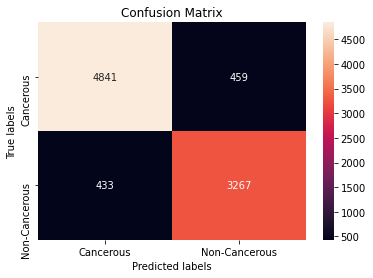

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_targets, np.round(cancer_predictions).astype('int32'))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Cancerous', 'Non-Cancerous'])
ax.yaxis.set_ticklabels(['Cancerous', 'Non-Cancerous'])